Excel dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.
Alternatif olarak, dosyanızı bu script ile aynı klasöre koyup sadece dosya adını yazabilirsiniz.

Örnek veri ile devam ediliyor...
Dataset Kullanım İstatistikleri:
2019: Toplam 7 dataset kullanımı
2020: Toplam 8 dataset kullanımı

En Çok Kullanılan Datasetler:
NSL-KDD: 3 kez kullanıldı
CICIDS2017: 3 kez kullanıldı
UNSW-NB15: 2 kez kullanıldı
IoTNI: 2 kez kullanıldı
Private: 2 kez kullanıldı


<Figure size 1500x800 with 0 Axes>

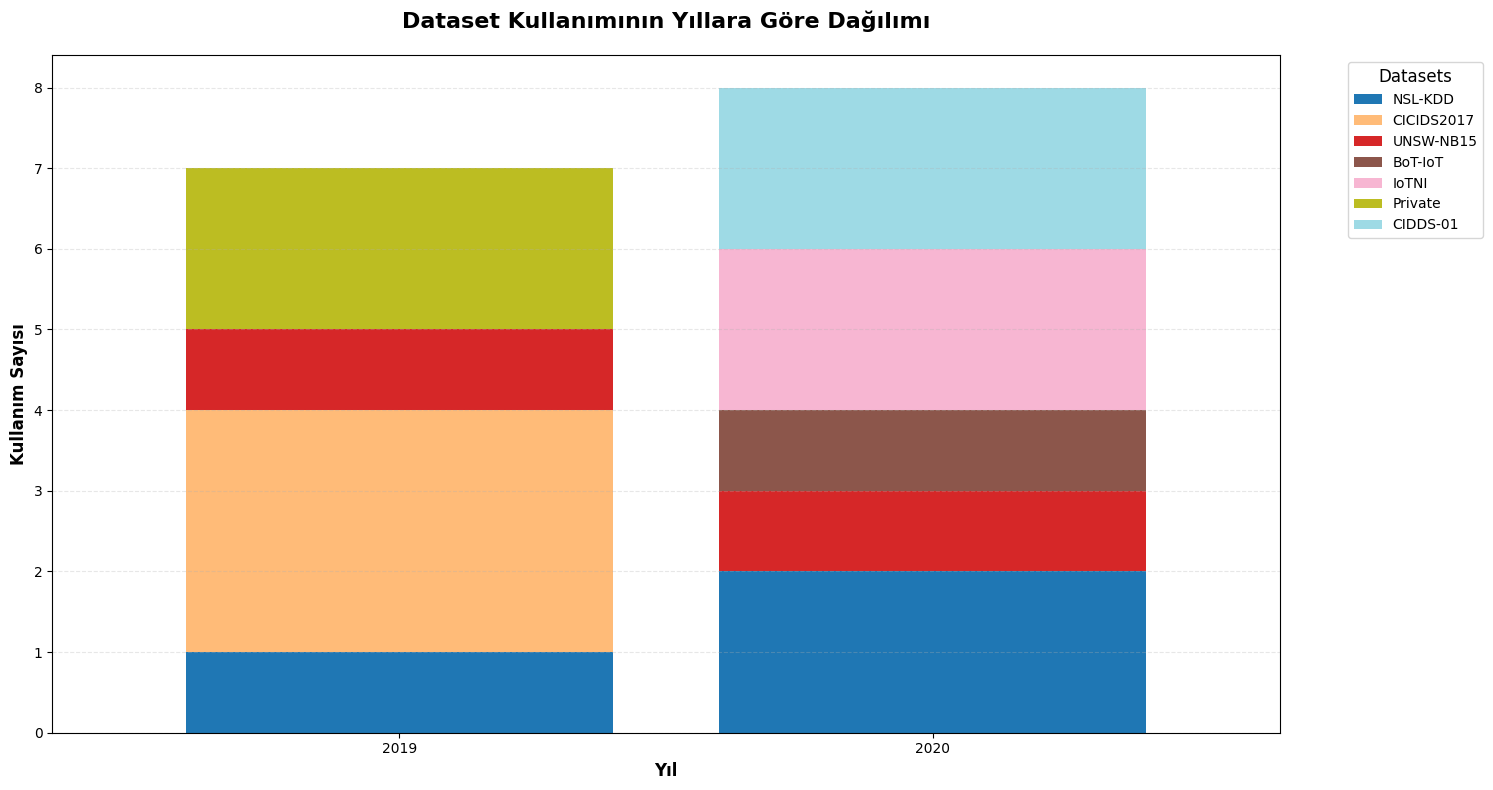


Yıllık Kullanım Tablosu:
      NSL-KDD  CICIDS2017  UNSW-NB15  BoT-IoT  IoTNI  Private  CIDDS-01
Year                                                                   
2019        1           3          1        0      0        2         0
2020        2           0          1        1      2        0         2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını okuma
# Not: Dosya yolunu kendi Excel dosyanızın yolu ile değiştirin
try:
    # Excel dosyasını oku
    df = pd.read_excel('verileriniz.xlsx')  # Dosya adını buraya yazın
    print("Excel dosyası başarıyla okundu!")
    print(f"Veri boyutu: {df.shape}")
    print("\nİlk birkaç satır:")
    print(df.head())
    
except FileNotFoundError:
    print("Excel dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    print("Alternatif olarak, dosyanızı bu script ile aynı klasöre koyup sadece dosya adını yazabilirsiniz.")
    # Örnek veri ile devam et
    print("\nÖrnek veri ile devam ediliyor...")
    data = """Year	KDD99	NSL-KDD	ISCXIDS2012	CICIDS2017	CICIDS2018	CICDDoS2019	UNSW-NB15	BoT-IoT	TON_IoT	IoTNI	IoT-23	DS2OS	N-BaIoT	Private	CIDDS-01	Edge-IIoTset	MQTT-IoTIDS20	Other
2019	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2019	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2019	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 
2019	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 
2020	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2020	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 
2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 
2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 
2020	- 	∙ 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- """
    
    lines = data.strip().split('\n')
    header = lines[0].split('\t')
    rows = [line.split('\t') for line in lines[1:]]
    df = pd.DataFrame(rows, columns=header)

# Year sütununu integer'a çevir
df['Year'] = df['Year'].astype(int)

# Dataset sütunlarını seç (Year hariç)
dataset_columns = [col for col in df.columns if col != 'Year']

# Her dataset için kullanım sayısını hesapla (∙ veya sayı varsa 1, yoksa 0)
for col in dataset_columns:
    df[col] = df[col].apply(lambda x: 1 if x.strip() not in ['', '-'] else 0)

# Yıllara göre gruplama ve toplama
yearly_usage = df.groupby('Year')[dataset_columns].sum()

# Sadece hiç kullanılmayan datasetleri çıkar
used_datasets = yearly_usage.columns[yearly_usage.sum() > 0]
yearly_usage_filtered = yearly_usage[used_datasets]

# Grafik oluşturma
plt.figure(figsize=(15, 8))

# Stacked bar chart
ax = yearly_usage_filtered.plot(kind='bar', stacked=True, figsize=(15, 8), 
                               colormap='tab20', width=0.8)

# Grafik özelleştirme
plt.title('Dataset Kullanımının Yıllara Göre Dağılımı', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Yıl', fontsize=12, fontweight='bold')
plt.ylabel('Kullanım Sayısı', fontsize=12, fontweight='bold')

# X ekseni etiketlerini düzelt
plt.xticks(rotation=0)

# Legend'ı düzenle
plt.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=10, title_fontsize=12)

# Grid ekle
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Layout'u sıkıştır
plt.tight_layout()

# Grafik istatistikleri yazdır
print("Dataset Kullanım İstatistikleri:")
print("=" * 40)
for year in yearly_usage_filtered.index:
    total_usage = yearly_usage_filtered.loc[year].sum()
    print(f"{year}: Toplam {total_usage} dataset kullanımı")

print("\nEn Çok Kullanılan Datasetler:")
print("=" * 30)
total_by_dataset = yearly_usage_filtered.sum().sort_values(ascending=False)
for dataset, count in total_by_dataset.head(5).items():
    print(f"{dataset}: {count} kez kullanıldı")

plt.show()

# Detaylı tablo gösterimi
print("\nYıllık Kullanım Tablosu:")
print("=" * 25)
print(yearly_usage_filtered)

In [18]:
import os
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
name_list=find_the_way('./files','.xlsx')
name_list

['./files\\data.xlsx',
 './files\\feature.xlsx',
 './files\\ml-.xlsx',
 './files\\score - Copy.xlsx',
 './files\\zscore.xlsx']

Excel dosyası başarıyla okundu!
Veri boyutu: (125, 19)

İlk birkaç satır:
   Year KDD99 NSL-KDD ISCXIDS2012 CICIDS2017 CICIDS2018 CICDDoS2019 UNSW-NB15  \
0  2019    -       ∙           -          -          -           -         -    
1  2019    -       -           -          ∙          -           -         -    
2  2019    -       -           -          ∙          -           -         -    
3  2019    -       -           -          ∙          -           -         -    
4  2019    -       -           -          -          -           -         ∙    

  BoT-IoT TON_IoT IoTNI IoT-23 DS2OS N-BaIoT Private CIDDS-01 Edge-IIoTset  \
0      -       -     -      -     -       -       -        -            -    
1      -       -     -      -     -       -       -        -            -    
2      -       -     -      -     -       -       -        -            -    
3      -       -     -      -     -       -       -        -            -    
4      -       -     -      -     -       -      

<Figure size 1500x800 with 0 Axes>

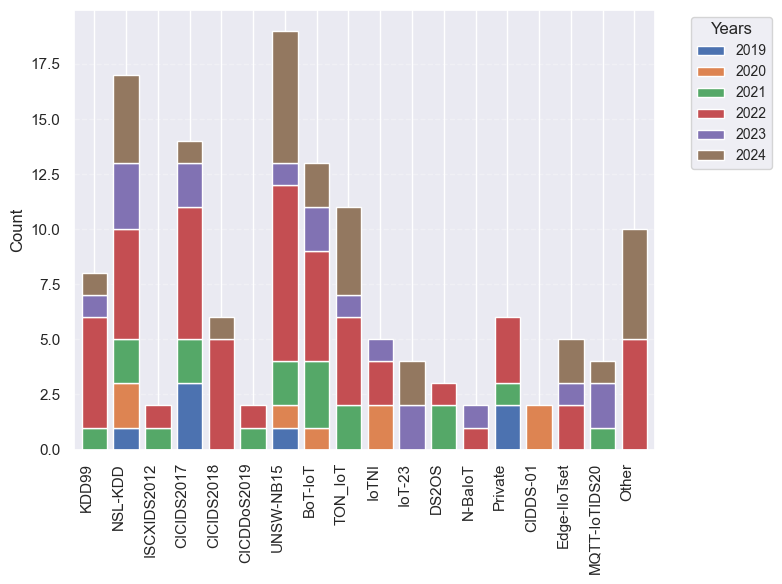


Veri Seti Kullanım Tablosu (Satırlar: Veri Setleri, Sütunlar: Yıllar):
Year           2019  2020  2021  2022  2023  2024
KDD99             0     0     1     5     1     1
NSL-KDD           1     2     2     5     3     4
ISCXIDS2012       0     0     1     1     0     0
CICIDS2017        3     0     2     6     2     1
CICIDS2018        0     0     0     5     0     1
CICDDoS2019       0     0     1     1     0     0
UNSW-NB15         1     1     2     8     1     6
BoT-IoT           0     1     3     5     2     2
TON_IoT           0     0     2     4     1     4
IoTNI             0     2     0     2     1     0
IoT-23            0     0     0     0     2     2
DS2OS             0     0     2     1     0     0
N-BaIoT           0     0     0     1     1     0
Private           2     0     1     3     0     0
CIDDS-01          0     2     0     0     0     0
Edge-IIoTset      0     0     0     2     1     2
MQTT-IoTIDS20     0     0     1     0     2     1
Other             0     0   

<Figure size 1500x800 with 0 Axes>

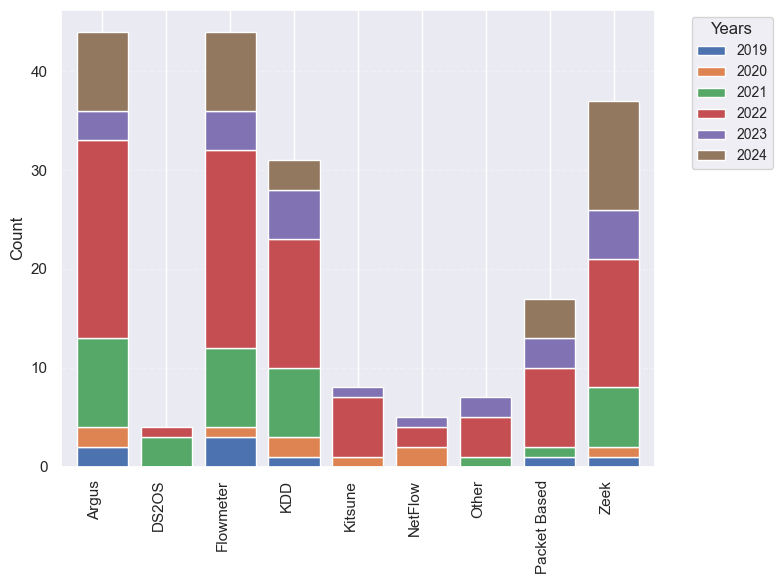


Veri Seti Kullanım Tablosu (Satırlar: Veri Setleri, Sütunlar: Yıllar):
Year          2019  2020  2021  2022  2023  2024
Argus            2     2     9    20     3     8
DS2OS            0     0     3     1     0     0
Flowmeter        3     1     8    20     4     8
KDD              1     2     7    13     5     3
Kitsune          0     1     0     6     1     0
NetFlow          0     2     0     2     1     0
Other            0     0     1     4     2     0
Packet Based     1     0     1     8     3     4
Zeek             1     1     6    13     5    11
Excel dosyası başarıyla okundu!
Veri boyutu: (125, 13)

İlk birkaç satır:
   Year Bagging Boosting CNN Decision Tree Tree Ensemble kNN Linear Models  \
0  2019      -        -   -             -             -   ∙             -    
1  2019      -        -   ∙             -             ∙   -             -    
2  2019      -        -   -             ∙             -   ∙             -    
3  2019      -        -   -             ∙           

<Figure size 1500x800 with 0 Axes>

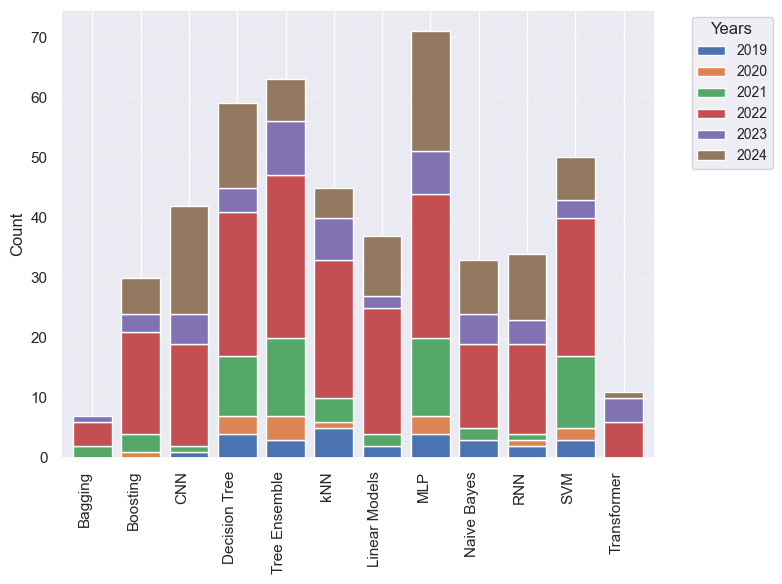


Veri Seti Kullanım Tablosu (Satırlar: Veri Setleri, Sütunlar: Yıllar):
Year           2019  2020  2021  2022  2023  2024
Bagging           0     0     2     4     1     0
Boosting          0     1     3    17     3     6
CNN               1     0     1    17     5    18
Decision Tree     4     3    10    24     4    14
Tree Ensemble     3     4    13    27     9     7
kNN               5     1     4    23     7     5
Linear Models     2     0     2    21     2    10
MLP               4     3    13    24     7    20
Naive Bayes       3     0     2    14     5     9
RNN               2     1     1    15     4    11
SVM               3     2    12    23     3     7
Transformer       0     0     0     6     4     1
Excel dosyası başarıyla okundu!
Veri boyutu: (125, 7)

İlk birkaç satır:
   Year Confusion Matrix Accuracy Recall Precision F1 Score AUC
0  2019               -         ∙      ∙         ∙        ∙   -
1  2019               -         ∙      ∙         ∙        -   -
2  2019      

<Figure size 1500x800 with 0 Axes>

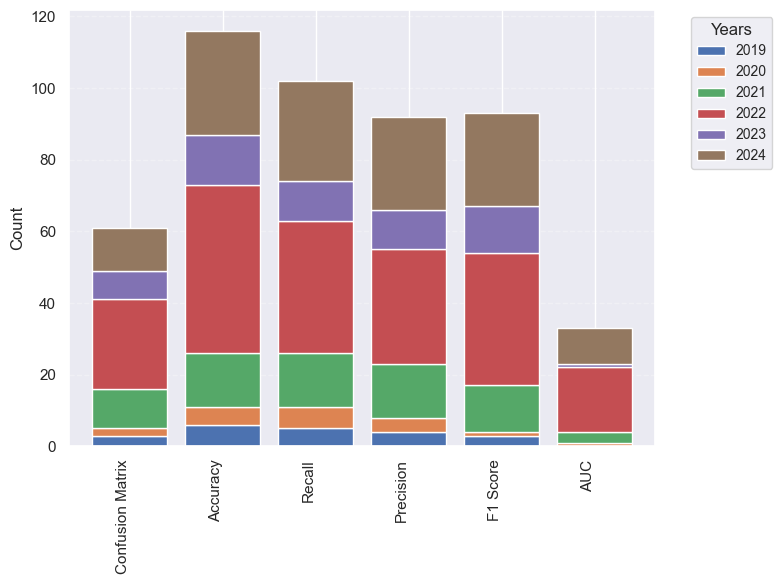


Veri Seti Kullanım Tablosu (Satırlar: Veri Setleri, Sütunlar: Yıllar):
Year              2019  2020  2021  2022  2023  2024
Confusion Matrix     3     2    11    25     8    12
Accuracy             6     5    15    47    14    29
Recall               5     6    15    37    11    28
Precision            4     4    15    32    11    26
F1 Score             3     1    13    37    13    26
AUC                  0     1     3    18     1    10
Excel dosyası başarıyla okundu!
Veri boyutu: (125, 7)

İlk birkaç satır:
   Year Confusion Matrix Accuracy Recall Precision F1 Score AUC
0  2019               -        93     92       100       96   -
1  2019               -        97     99        98        -   -
2  2019               ∙        98     -         -         -   -
3  2019               -       100     99        99       99   -
4  2019               -        84     -         -         -   -


AttributeError: 'int' object has no attribute 'strip'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
# Excel dosyasını okuma
# Not: Dosya yolunu kendi Excel dosyanızın yolu ile değiştirin


for myname in name_list:
    try:
        # Excel dosyasını oku
        df = pd.read_excel(myname)  # Dosya adını buraya yazın
        df=df.fillna("-")
        print("Excel dosyası başarıyla okundu!")
        print(f"Veri boyutu: {df.shape}")
        print("\nİlk birkaç satır:")
        print(df.head())
        
    except FileNotFoundError:
        print("Excel dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
        print("Alternatif olarak, dosyanızı bu script ile aynı klasöre koyup sadece dosya adını yazabilirsiniz.")
        # Örnek veri ile devam et
        print("\nÖrnek veri ile devam ediliyor...")
        data = """Year	KDD99	NSL-KDD	ISCXIDS2012	CICIDS2017	CICIDS2018	CICDDoS2019	UNSW-NB15	BoT-IoT	TON_IoT	IoTNI	IoT-23	DS2OS	N-BaIoT	Private	CIDDS-01	Edge-IIoTset	MQTT-IoTIDS20	Other
    2019	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2019	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2019	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2019	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 
    2019	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 
    2020	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2020	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 
    2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 
    2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	- 
    2020	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- 
    2020	- 	∙ 	- 	- 	- 	- 	∙ 	- 	- 	- 	- 	- 	- 	- 	∙ 	- 	- 	- """
        
        lines = data.strip().split('\n')
        header = lines[0].split('\t')
        rows = [line.split('\t') for line in lines[1:]]
        df = pd.DataFrame(rows, columns=header)
    
    # Year sütununu integer'a çevir
    df['Year'] = df['Year'].astype(int)
    
    # Dataset sütunlarını seç (Year hariç)
    dataset_columns = [col for col in df.columns if col != 'Year']
    
    # Her dataset için kullanım sayısını hesapla (∙ veya sayı varsa 1, yoksa 0)
    for col in dataset_columns:
        df[col] = df[col].apply(lambda x: 1 if x.strip() not in ['', '-'] else 0)
    
    # Yıllara göre gruplama ve toplama
    yearly_usage = df.groupby('Year')[dataset_columns].sum()
    
    # Sadece hiç kullanılmayan datasetleri çıkar
    used_datasets = yearly_usage.columns[yearly_usage.sum() > 0]
    yearly_usage_filtered = yearly_usage[used_datasets]
    
    # Transpose yaparak veri setlerini satır, yılları sütun yap
    dataset_usage = yearly_usage_filtered.T
    
    # Grafik oluşturma
    plt.figure(figsize=(15, 8))
    
    # Stacked bar chart - şimdi x ekseninde datasetler, yığılmış olarak yıllar
    ax = dataset_usage.plot(kind='bar', stacked=True, figsize=(8,6), 
                            width=0.8)
    
    # Grafik özelleştirme
    #plt.title('Veri Setlerinin Yıllara Göre Kullanım Dağılımı', fontsize=16, fontweight='bold', pad=20)
    #plt.xlabel('Veri Setleri', fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12)#, fontweight='bold')
    
    # X ekseni etiketlerini çapraz yap (uzun isimler için)
    plt.xticks(rotation=90, ha='right')
    
    # Legend'ı düzenle - şimdi yılları gösteriyor
    plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left', 
              fontsize=10, title_fontsize=12)
    
    # Grid ekle
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Layout'u sıkıştır
    plt.tight_layout()
    
    # Grafik istatistikleri yazdır
    print("Veri Seti Kullanım İstatistikleri:")
    print("=" * 40)
    for dataset in dataset_usage.index:
        total_usage = dataset_usage.loc[dataset].sum()
        if total_usage > 0:  # Sadece kullanılan veri setlerini göster
            print(f"{dataset}: Toplam {total_usage} kez kullanıldı")
    
    print("\nYıllara Göre Toplam Kullanım:")
    print("=" * 30)
    yearly_totals = dataset_usage.sum()
    for year, count in yearly_totals.items():
        print(f"{year}: {count} veri seti kullanımı")
    
    graph_name=myname.replace("xlsx","pdf")
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
    
    # Detaylı tablo gösterimi
    print("\nVeri Seti Kullanım Tablosu (Satırlar: Veri Setleri, Sütunlar: Yıllar):")
    print("=" * 70)
    print(dataset_usage[dataset_usage.sum(axis=1) > 0])  # Sadece kullanılan veri setlerini göster

In [14]:
df

,1,Year,KDD99,NSL-KDD,ISCXIDS2012,CICIDS2017,CICIDS2018,CICDDoS2019,UNSW-NB15,BoT-IoT,...,NetFlow,Other.1,Packet Based,Zeek,Confusion Matrix,Accuracy,Recall,Precision,F1 Score,AUC
0,2,Year,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,3,2019,-,∙,-,-,-,-,-,-,...,-,-,-,-,-,93,92,100,96,-
2,4,2019,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,5,2019,-,-,-,∙,-,-,-,-,...,-,-,-,-,-,97,99,98,-,-
4,6,2019,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,217,2024,-,-,-,-,-,-,●,-,...,-,-,-,●,-,100,100,100,100,100.0
216,218,2024,-,●,-,-,-,-,-,-,...,-,-,-,-,-,100,100,100,-,-
217,219,2024,-,-,-,-,-,-,●,-,...,-,-,-,-,-,99,98,96,-,-
218,220,2024,-,-,-,-,-,-,-,-,...,-,-,●,-,●,100,100,100,100,100.0
